# Segmentation of Indian Traffic

In [1]:
# Installing required dependancies
!pip3 install tensorflow==2.2.0
!pip3 install keras==2.3.1
!pip3 install -U segmentation-models
%env SM_FRAMEWORK=tf.keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 2.9 MB 52.1 MB/s 
     |████████████████████████████████| 26.1 MB 1.3 MB/s 
     |████████████████████████████████| 3.0 MB 51.2 MB/s 
     |████████████████████████████████| 454 kB 72.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Unins

In [2]:
# Importing necessary libraries
import gdown
import glob
import math
import re
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import tensorflow as tf
from tensorflow.keras.utils import get_source_inputs
import keras
from keras.utils.layer_utils import get_source_inputs
tf.keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [3]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.2.0


In [9]:
# Downloading the data
#!gdown --id 1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ
!wget --header="Host: doc-04-18-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_el9vl9o4mvn7qd7f3inhkltl32aild3o_nonce=fchclfa3r3tk0" --header="Connection: keep-alive" "https://doc-04-18-docs.googleusercontent.com/docs/securesc/n1cok581id19ek2hsqcsm7lo1e92gnln/snh67srst6i3romljedv0ql8e15hmed8/1659875400000/00484516897554883881/07351841823515172879/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?ax=AI9vYm4x6ie_4bpL-r_dCo9hlcPbTio2SpAPGbibk3eJnnhtRb2ZWpGw5KEjJE9YZWJGexFFd8ht8-Ic04NeTpvy0MGk6z8LZpUPS_KrpoRQAnRxd9I-zpFAD4JecmQxKwT_w8U_S289vnSnbYKTaQfpI26T8PYSxP5sOPYvY-qcw3XaIEWL4XIFYhS7MwKqRaj96ji7hldXicXJmqJVBW7TbjJPcCQtwuG9nwGPqihK5v9Mu7gFP7ttEfXLMdAaJbwMZRk2KWgB5U0RoBQTNCLeHjPF03vbf-SVJEokxcotZH0yZ3mxiGZnNlr_RonKfAqaOvoKB_557RPuLcQEMZSgZGnJnsUjiVGBDkqHG0kkY7qaoZNb4RVApikdKGFo6LXMUG871GrzAlDxLKvMeYiLv6J6g-yy5MNlTbCcbx70boo8VqtOvZRyRfODn3stbxWT4GsMTtyJnpz4clVYoKJz-SCBY7k38SsNmDtLJNObF2VZrCnD-r2521kGHzK_ax-W3HD-2w9vq7N5p7ACwktysfDCJh81_48vrIUCxPku5Y_204-Tu6fDvy8dpZqBtibXhzHywNAQXIgNZI9W2v47pfXIZCRUrNzAE1IJLgVCMHY0AoucS9Lt_rPO7bRFINYFyOKPCIRfm1z_QvIRNK3hPVtEUD2kc3TcRs1mgpnw10GWJ9QCKibHvhf4LCsNZ6RSSQWgn07piSUjQcn3&uuid=5e7dd90e-d824-402e-b12b-b0cbd5cbc49d&authuser=0&nonce=fchclfa3r3tk0&user=07351841823515172879&hash=76035inrg7hjn743qrpi2qvbv83oet7e" -c -O 'data.zip'

--2022-08-07 12:30:56--  https://doc-04-18-docs.googleusercontent.com/docs/securesc/n1cok581id19ek2hsqcsm7lo1e92gnln/snh67srst6i3romljedv0ql8e15hmed8/1659875400000/00484516897554883881/07351841823515172879/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?ax=AI9vYm4x6ie_4bpL-r_dCo9hlcPbTio2SpAPGbibk3eJnnhtRb2ZWpGw5KEjJE9YZWJGexFFd8ht8-Ic04NeTpvy0MGk6z8LZpUPS_KrpoRQAnRxd9I-zpFAD4JecmQxKwT_w8U_S289vnSnbYKTaQfpI26T8PYSxP5sOPYvY-qcw3XaIEWL4XIFYhS7MwKqRaj96ji7hldXicXJmqJVBW7TbjJPcCQtwuG9nwGPqihK5v9Mu7gFP7ttEfXLMdAaJbwMZRk2KWgB5U0RoBQTNCLeHjPF03vbf-SVJEokxcotZH0yZ3mxiGZnNlr_RonKfAqaOvoKB_557RPuLcQEMZSgZGnJnsUjiVGBDkqHG0kkY7qaoZNb4RVApikdKGFo6LXMUG871GrzAlDxLKvMeYiLv6J6g-yy5MNlTbCcbx70boo8VqtOvZRyRfODn3stbxWT4GsMTtyJnpz4clVYoKJz-SCBY7k38SsNmDtLJNObF2VZrCnD-r2521kGHzK_ax-W3HD-2w9vq7N5p7ACwktysfDCJh81_48vrIUCxPku5Y_204-Tu6fDvy8dpZqBtibXhzHywNAQXIgNZI9W2v47pfXIZCRUrNzAE1IJLgVCMHY0AoucS9Lt_rPO7bRFINYFyOKPCIRfm1z_QvIRNK3hPVtEUD2kc3TcRs1mgpnw10GWJ9QCKibHvhf4LCsNZ6RSSQWgn07piSUjQcn3&uuid=5e7dd90e-d824-402e-b12b-b0c

In [10]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/images/377/frame28480_leftImg8bit.jpg  
  inflating: data/images/377/frame28699_leftImg8bit.jpg  
  inflating: data/images/377/frame28808_leftImg8bit.jpg  
  inflating: data/images/377/frame29080_leftImg8bit.jpg  
  inflating: data/images/377/frame29271_leftImg8bit.jpg  
  inflating: data/images/377/frame29435_leftImg8bit.jpg  
  inflating: data/images/377/frame29653_leftImg8bit.jpg  
  inflating: data/images/377/frame29817_leftImg8bit.jpg  
  inflating: data/images/377/frame30062_leftImg8bit.jpg  
  inflating: data/images/377/frame30199_leftImg8bit.jpg  
  inflating: data/images/377/frame3039_leftImg8bit.jpg  
  inflating: data/images/377/frame30417_leftImg8bit.jpg  
  inflating: data/images/377/frame30499_leftImg8bit.jpg  
  inflating: data/images/377/frame30608_leftImg8bit.jpg  
  inflating: data/images/377/frame30744_leftImg8bit.jpg  
  inflating: data/images/377/frame30908_leftImg8bit.jpg  
  inflating: data/imag

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [11]:
root_dir = os.getcwd()
print(f"Root folder path: {root_dir}")

Root folder path: /content


In [12]:
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    images_path = root_dir+'/data/images'
    json_path = root_dir+'/data/mask'

    jpg_filenames = []
    for folder in os.listdir(images_path):
        path = images_path+'/'+folder
        for f in os.listdir(path):
            fp = path+'/'+f
            jpg_filenames.append(fp[9:])
    
    json_filenames = []
    for folder in os.listdir(json_path):
        path = json_path+'/'+folder
        for f in os.listdir(path):
            fp = path+'/'+f
            json_filenames.append(fp[9:])
    
    data = pd.DataFrame({"image": sorted(jpg_filenames),
                         "json": sorted(json_filenames)})
    
    return data

In [13]:
data_df = return_file_names_df(root_dir)
data_df.head()

image  \
0  data/images/201/frame0029_leftImg8bit.jpg   
1  data/images/201/frame0299_leftImg8bit.jpg   
2  data/images/201/frame0779_leftImg8bit.jpg   
3  data/images/201/frame1019_leftImg8bit.jpg   
4  data/images/201/frame1469_leftImg8bit.jpg   

                                           json  
0  data/mask/201/frame0029_gtFine_polygons.json  
1  data/mask/201/frame0299_gtFine_polygons.json  
2  data/mask/201/frame0779_gtFine_polygons.json  
3  data/mask/201/frame1019_gtFine_polygons.json  
4  data/mask/201/frame1469_gtFine_polygons.json

> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [16]:
print(f"data_df shape : {data_df.shape}")

data_df shape : (4008, 2)


## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.
to see how to get the object from the json file please check <a href='https://www.geeksforgeeks.org/read-json-file-using-python/'>this blog </a>

In [17]:
def return_unique_labels(data_df):
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and return them
    # if open any json file using any editor you will get better sense of it

    filenames = data_df['json'].values
    labels = []
    for filename in tqdm(filenames):
        filepath = os.path.join(root_dir, filename)
        with open(filepath) as file_json:
            json_data = json.load(file_json)
            for obj in json_data['objects']:
                labels.append(obj['label'])

    unique_labels = np.unique(labels)

    return unique_labels

In [18]:
unique_labels = return_unique_labels(data_df)

100%|██████████| 4008/4008 [00:30<00:00, 133.41it/s]


<img src='https://i.imgur.com/L4QH6Tp.png'>

In [19]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [21]:
def get_poly(file):
    # this function will take a file name as argument
    
    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image
    label = []
    vertexlist = []
    with open(file) as json_object:
        json_data = json.load(json_object)
        w = json_data["imgWidth"]
        h = json_data["imgHeight"]
        for obj in json_data["objects"]:
            l = obj["label"]
            label.append(l)
            p = obj["polygon"]
            p_tup = [tuple(i) for i in p]
            vertexlist.append(p_tup)
    
    return w, h, label, vertexlist

## 4. Creating Image segmentations by drawing set of polygons

### Example

(28, 28, 3)
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 

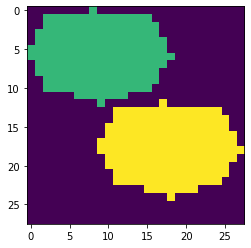

In [23]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
# please play with the fill value
# writing the first polygon
img1.polygon(x1, fill =20)
# writing the second polygon
img1.polygon(x2, fill =30)

img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])
im.save("test_image.png")

### Computing masks

In [24]:
def compute_masks(data_df):
    # after you have computed the vertexlist plot that polygone in image like this
    os.mkdir("/content/data/output/")
    mask_dir_path = os.path.join(root_dir,"data/output")
    mask_filenames = []
    for fname in tqdm(data_df['json'].values):
        fpath = os.path.join(root_dir, fname)
        w, h, label, vertexlist = get_poly(fpath)
        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)
        for i in range(len(label)): 
            if len(vertexlist[i]) > 1:
                img1.polygon(vertexlist[i], fill = label_clr[label[i]])
    
        # after drawing all the polygons that we collected from json file, 
        # you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"
        img = np.array(img)
        m_image = Image.fromarray(img[:,:,0])
        f_png = re.sub(r".json", ".png", fname)
        save_path = os.path.join(mask_dir_path, f_png[10:])
        folder = fname.split("/")[2]
        if folder not in os.listdir(mask_dir_path):
            os.mkdir(os.path.join(mask_dir_path, folder))
        m_image.save(save_path)
        # after saving the image into disk, store the path in a list
        mask_filenames.append(save_path[9:])
        # after storing all the paths, add a column to the data_df['mask'] ex: data_df['mask']= mask_paths
    
    data_df['mask'] = mask_filenames
    
    return data_df

In [25]:
# import shutil
# shutil.rmtree('/content/data/output')

In [26]:
data_df = compute_masks(data_df)
data_df.head()

100%|██████████| 4008/4008 [03:59<00:00, 16.75it/s]


image  \
0  data/images/201/frame0029_leftImg8bit.jpg   
1  data/images/201/frame0299_leftImg8bit.jpg   
2  data/images/201/frame0779_leftImg8bit.jpg   
3  data/images/201/frame1019_leftImg8bit.jpg   
4  data/images/201/frame1469_leftImg8bit.jpg   

                                           json  \
0  data/mask/201/frame0029_gtFine_polygons.json   
1  data/mask/201/frame0299_gtFine_polygons.json   
2  data/mask/201/frame0779_gtFine_polygons.json   
3  data/mask/201/frame1019_gtFine_polygons.json   
4  data/mask/201/frame1469_gtFine_polygons.json   

                                            mask  
0  data/output/201/frame0029_gtFine_polygons.png  
1  data/output/201/frame0299_gtFine_polygons.png  
2  data/output/201/frame0779_gtFine_polygons.png  
3  data/output/201/frame1019_gtFine_polygons.png  
4  data/output/201/frame1469_gtFine_polygons.png

In [27]:
#having the final dataframe to a csv file
data_df.to_csv('preprocessed_data.csv', index=False)

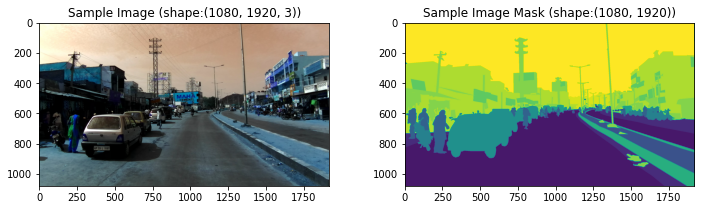

In [28]:
# Printing sample image and its corresponding mask
plt.figure(figsize=(12,3))
img_sam = cv2.imread("/content/data/images/201/frame0029_leftImg8bit.jpg", cv2.IMREAD_UNCHANGED)
plt.subplot(121, title=f"Sample Image (shape:{(img_sam.shape)})")
plt.imshow(img_sam)

mask_sam = cv2.imread("/content/data/output/201/frame0029_gtFine_polygons.png", cv2.IMREAD_UNCHANGED)
plt.subplot(122, title=f"Sample Image Mask (shape:{(mask_sam.shape)})")
plt.imshow(mask_sam)

## Task 2: Applying Unet to segment the images

<pre>
* please check the paper: https://arxiv.org/abs/1505.04597

* <img src='https://i.imgur.com/rD4yP7J.jpg' width="500">

* As a part of this assignment we won't writingt this whole architecture, rather we will be doing transfer learning

* please check the library <a hreaf='https://github.com/qubvel/segmentation_models'>https://github.com/qubvel/segmentation_models</a>

* You can install it like this "pip install -U segmentation-models==0.2.1", even in google colab you can install the    same with "!pip install -U segmentation-models==0.2.1" 

* Check the reference notebook in which we have solved one end to end case study of image forgery detection using same  unet

* The number of channels in the output will depend on the number of classes in your data, since we know that we are having 21 classes, the number of channels in the output will also be 21

* <strong>This is where we want you to explore, how do you featurize your created segmentation map note that the original map will be of (w, h, 1) and the output will be (w, h, 21) how will you calculate the loss</strong>, you can check the examples in segmentation github

* please use the loss function that is used in the refence notebooks

</pre>

### Task 2.1: Dice loss

<pre>
* Explain the Dice loss
* 1. Write the formualtion
* 2. Range of the loss function
* 3. Interpretation of loss function
* 4. Write your understanding of the loss function, how does it helps in segmentation
</pre>

<pre>
* Explain the Dice loss
</pre>
<pre>
* 1. Write the formualtion
</pre>
-> $ Diceloss = L(precision,recall) = 1−(1+β^2)$$\large \frac{(precision ⋅ recall)}{(β^2 ⋅ precision + recall)}$

or, in terms of TP, FP, FN -

 -> $ Diceloss = L(tp,fp,fn)=$$\large \frac{(1+β^2)⋅tp}{(1+β^2)⋅fp+β^2⋅fn+fp}$
<pre>
* 2. Range of the loss function
</pre>
-> Dice loss value ranges from 0 to 1
<pre>
* 3. Interpretation of loss function
</pre>
-> Loss value 0 indicates exact overlap between input segmentation and predicted segmentation and loss 1 indicates 0 overlap and for the lvalues between 0 and 1 it indicates corresponding overlap proportion.
<pre>
* 4. Write your understanding of the loss function, how does it helps in segmentation
</pre>
Dice_loss function calulates error between input segmentation and predicted segmentation by predicting the class for each pixel in the image. Thus total counts of TP, FP, FN pixels are calculated for each image to calculate precision and recall, then dice_loss value is calculated using above formula. We try to minimize this error during optimization. Minimizing the error i.e maximizing the overlap between input_segmentation and predicted segmentation will improve our model capability to perform semantic segmentation.

### Task 2.2: Training Unet


<pre>
* Split the data into 80:20.
* Train the UNET on the given dataset and plot the train and validation loss.
* As shown in the reference notebook plot 20 images from the test data along with its segmentation map, predicted map.
</pre>

In [29]:
# Splitting data into train and validation
from sklearn.model_selection import train_test_split

if 'preprocessed_data.csv' not in os.listdir(): 
    !gdown --id 1tD1nXvc1OFePrKx8MFvzTF16yeWBhjzp

data_df = pd.read_csv("/content/preprocessed_data.csv")
train, validation = train_test_split(data_df, test_size = 0.1, random_state=33, shuffle=False)

In [30]:
print(f"Train data shape: {train.shape}")
print(f"Validation data shape: {validation.shape}")

Train data shape: (3607, 3)
Validation data shape: (401, 3)


### Creating train and validation datasets for training the model

In [31]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [32]:
import imgaug.augmenters as iaa
# Defining augmentations
aug2 = iaa.Fliplr(1)
aug3 = iaa.Flipud(1)
aug4 = iaa.Emboss(alpha=(1), strength=1)
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))

In [33]:
# Defining necessary functions
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()


def normalize_image(mask):
    mask = mask/255
    return mask


class Dataset:
    # All the classes present in the image mask
    # CLASSES = list(np.unique(list(label_clr.values())))
    
    # here we are collecting the file_names because in our dataset, both our images and maks will have same file name
    # ex: fil_name.jpg   file_name.mask.jpg
    def __init__(self, root_dir, img_file_names, mask_file_names, classes=None, augment=True):
        
        self.img_ids = img_file_names
        self.mask_ids = mask_file_names
        # the paths of images
        self.images_fps   = [os.path.join(root_dir, img_name) for img_name in self.img_ids]
        # the paths of segmentation masks
        self.masks_fps    = [os.path.join(root_dir, mask_name) for mask_name in self.mask_ids]
        # giving labels for each class
        self.class_values = classes
        self.augment = augment
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        image = cv2.resize(image, (256,256), interpolation=cv2.INTER_NEAREST)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = normalize_image(image)
        
        mask = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)
        mask = cv2.resize(mask, (256,256), interpolation=cv2.INTER_NEAREST)
        #mask = normalize_image(mask)
        image_masks = [np.where(mask == idx, mask, 0) for idx in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float')
   
        if self.augment:  
            a = np.random.uniform()
            
            if a<0.2:
                image = aug2.augment_image(image)
                image_mask = aug2.augment_image(image_mask)
            elif a<0.4:
                image = aug3.augment_image(image)
                image_mask = aug3.augment_image(image_mask)
            elif a<0.6:
                image = aug4.augment_image(image)
                image_mask = aug4.augment_image(image_mask)
            elif a<0.8:
                image = aug5.augment_image(image)
                image_mask = image_mask
            else:
                image = aug6.augment_image(image)
                image_mask = aug6.augment_image(image_mask)
            
        return image, image_mask
        
    def __len__(self):
        return len(self.img_ids)
    
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [34]:
classes =  list(np.unique(list(label_clr.values())))

In [35]:
# Creating train and validation dataset generators
BATCH_SIZE = 8
train_dataset = Dataset(root_dir, train['image'].values, train['mask'].values, classes=classes, augment=True)
val_dataset = Dataset(root_dir, validation['image'].values, validation['mask'].values, classes=classes, augment=False)
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = Dataloder(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(f"Train dataloader shape: {train_dataloader[0][0].shape}")
print(f"Validation dataloader shape: {val_dataloader[0][1].shape}")

Train dataloader shape: (8, 256, 256, 3)
Validation dataloader shape: (8, 256, 256, 21)


## Training Unet

In [ ]:
# Importing the Unet model
import segmentation_models as sm
from segmentation_models import Unet

# Importing callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

Segmentation Models: using `tf.keras` framework.


In [ ]:
from tensorflow.python.framework.ops import Tensor
# Defining Callbacks
if "unet" not in os.listdir():
    os.mkdir("/content/unet")
    os.mkdir("/content/unet/saved_models")
    os.mkdir("/content/unet/logs")

save_path = "/content/unet/saved_models/epoch:{epoch:02d}_loss:{val_iou_score:.4f}.hdf5"
log_path = "/content/unet/logs"
saver = ModelCheckpoint(save_path, save_best_only=True, monitor='val_iou_score', mode='max')
stopper = EarlyStopping(monitor='val_iou_score', mode='max', patience=2)
reducer = ReduceLROnPlateau(monitor='val_iou_score', factor=0.5, min_lr=0.0000001, mode='max', patience=2)
tb = TensorBoard(log_path, histogram_freq=2)
callbacks = [saver, stopper, reducer, tb]

In [ ]:
# Calling model
model = Unet('resnet34', encoder_weights='imagenet', classes=21, activation='softmax', input_shape=(256,256,3))

85524480/85521592 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [ ]:
#Importing loss and metric
dice_loss = sm.losses.dice_loss
iou = sm.metrics.iou_score

# Compiling the model
model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss = dice_loss,
              metrics = [iou])

In [ ]:
# Training the model
unet_hist = model.fit(train_dataloader, epochs=7, steps_per_epoch=len(train_dataloader),
                      validation_data=val_dataloader, validation_steps=len(val_dataloader),
                      callbacks = callbacks)

Epoch 1/7
450/450 [==============================] - 254s 564ms/step - loss: 0.9047 - iou_score: 0.0716 - val_loss: 0.8402 - val_iou_score: 0.1840 - lr: 1.0000e-05
Epoch 2/7
450/450 [==============================] - 251s 557ms/step - loss: 0.8314 - iou_score: 0.1739 - val_loss: 0.7854 - val_iou_score: 0.2276 - lr: 1.0000e-05
Epoch 3/7
450/450 [==============================] - 252s 559ms/step - loss: 0.7627 - iou_score: 0.2998 - val_loss: 0.7168 - val_iou_score: 0.3586 - lr: 1.0000e-05
Epoch 4/7
450/450 [==============================] - 251s 558ms/step - loss: 0.7096 - iou_score: 0.4355 - val_loss: 0.6723 - val_iou_score: 0.4534 - lr: 1.0000e-05
Epoch 5/7
450/450 [==============================] - 252s 560ms/step - loss: 0.6595 - iou_score: 0.4585 - val_loss: 0.6146 - val_iou_score: 0.5765 - lr: 1.0000e-05
Epoch 6/7
450/450 [==============================] - 251s 557ms/step - loss: 0.6029 - iou_score: 0.6686 - val_loss: 0.5753 - val_iou_score: 0.6686 - lr: 1.0000e-05
Epoch 7/7
450/45

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/unet/logs

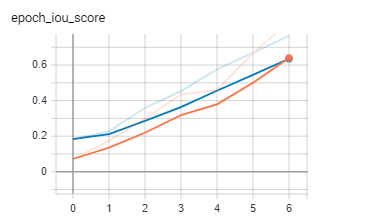 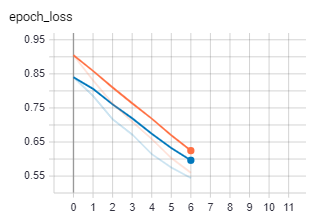

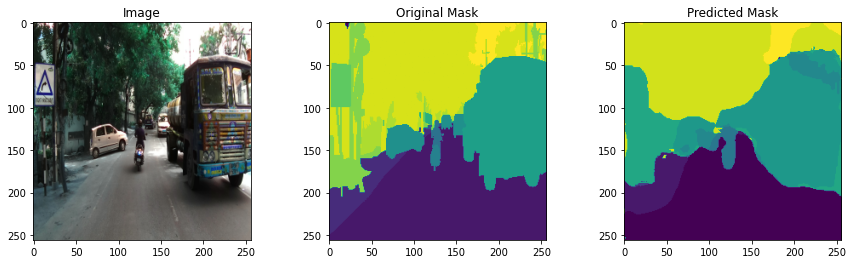

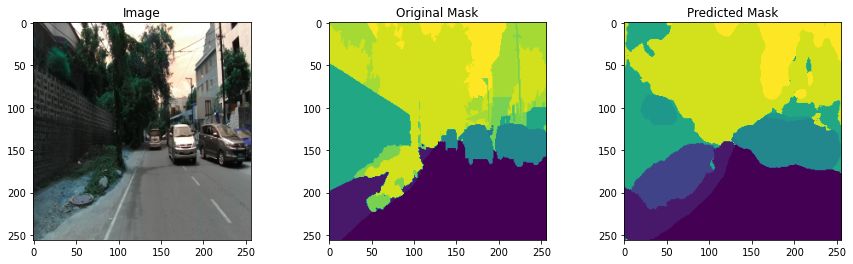

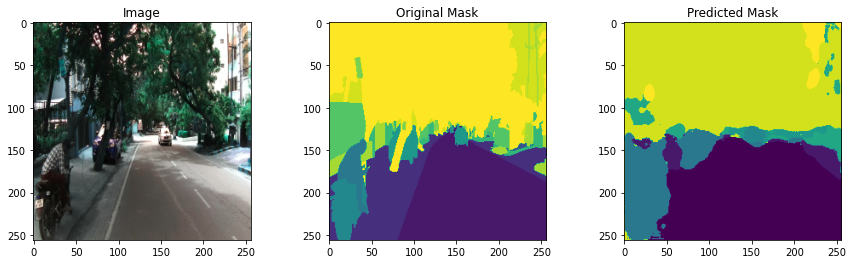

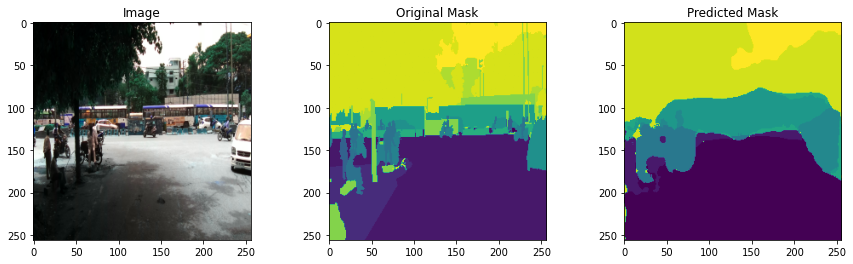

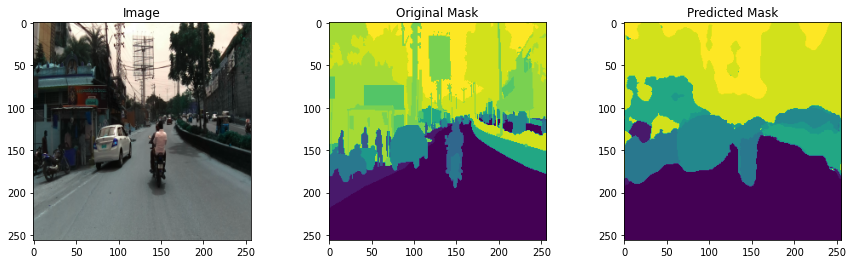

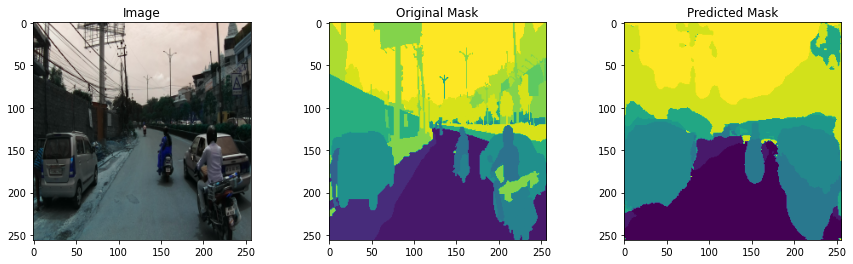

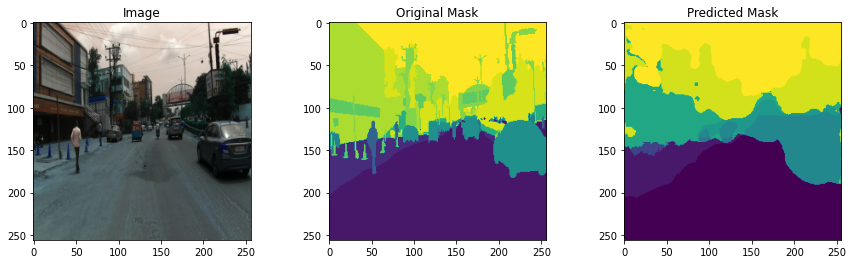

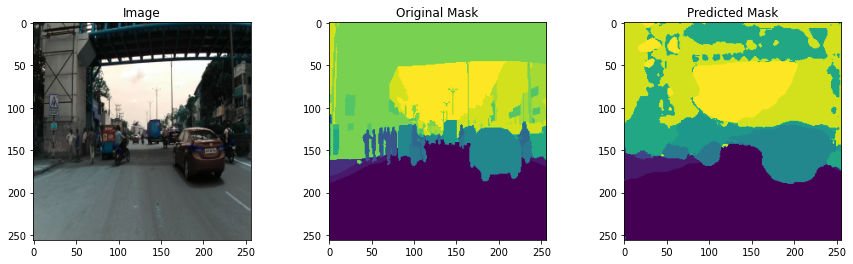

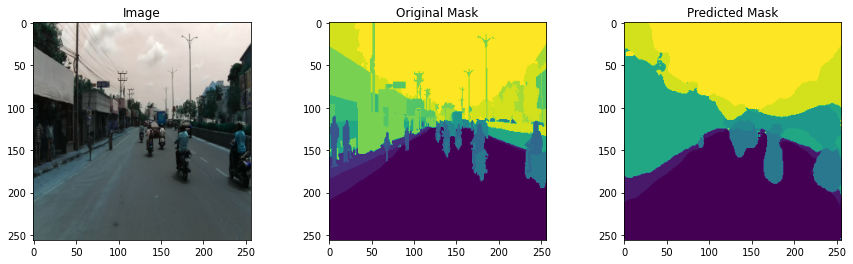

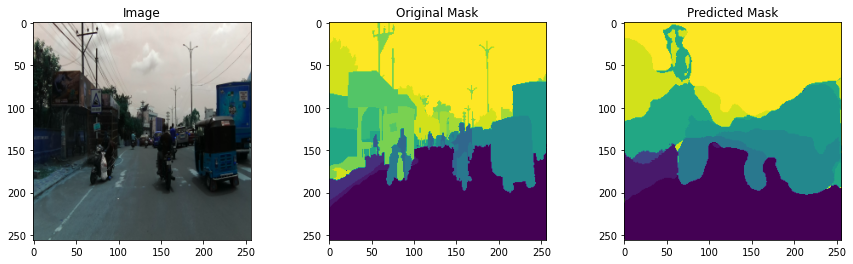

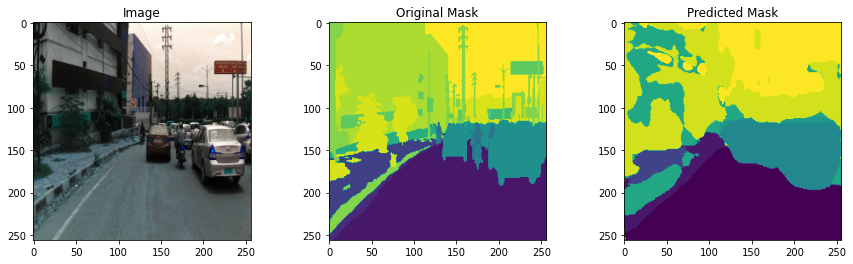

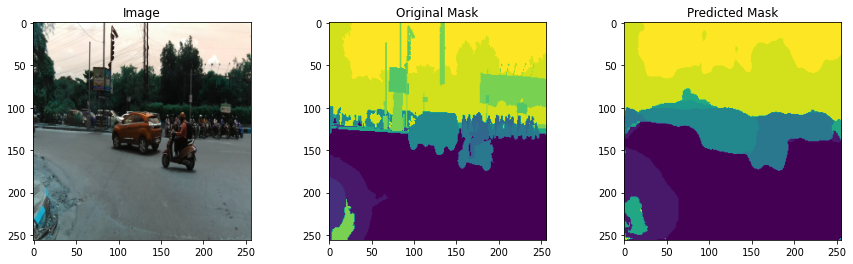

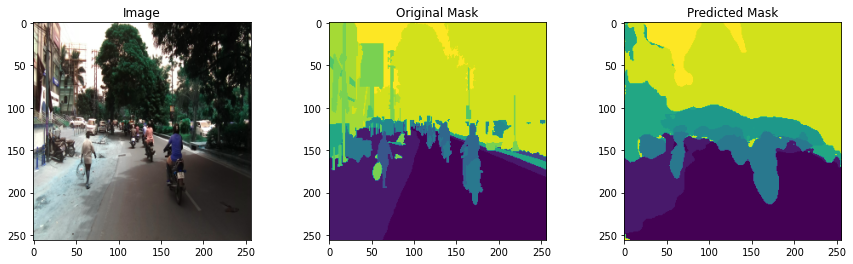

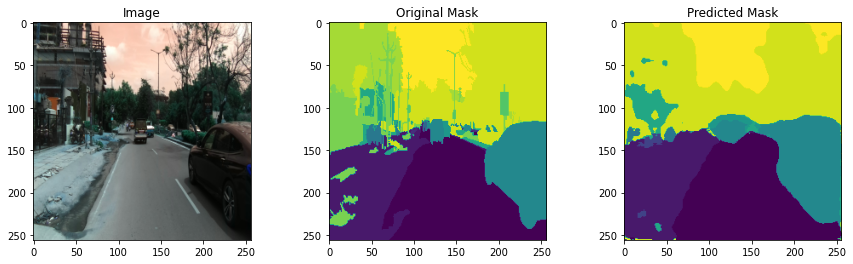

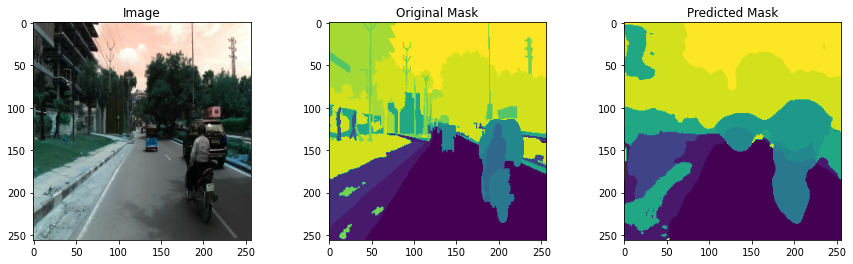

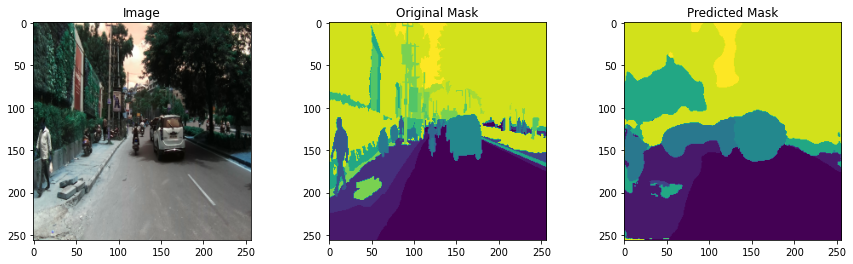

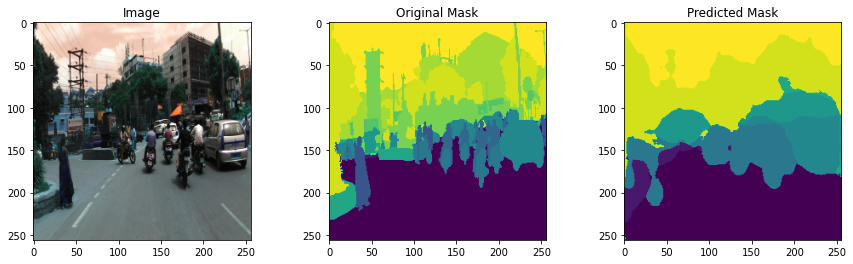

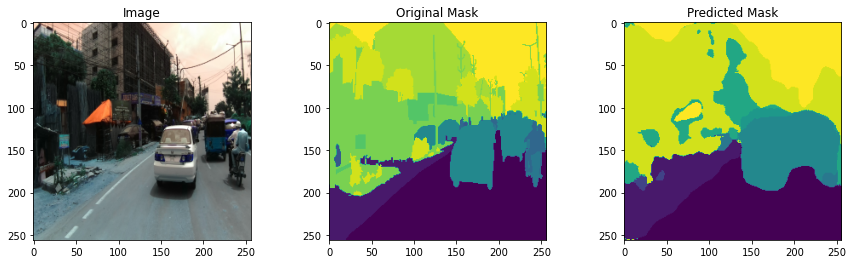

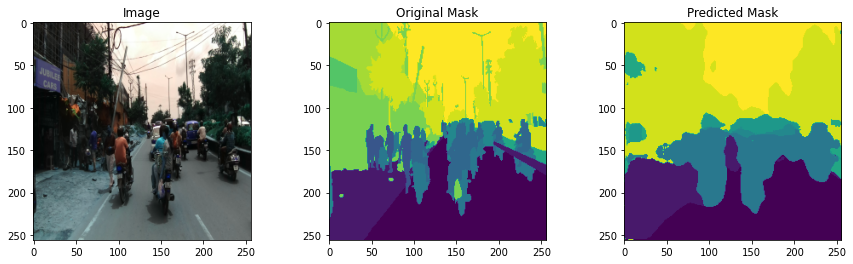

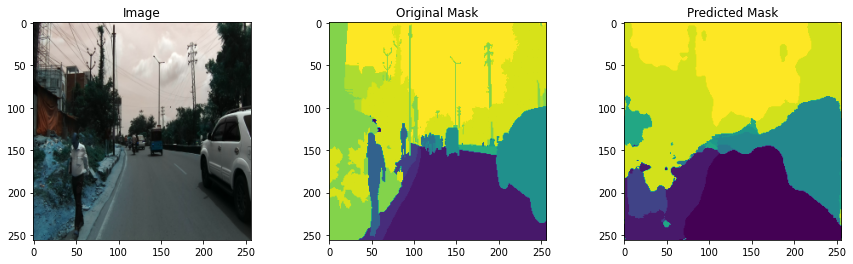

In [ ]:
for i in range(20):    
    img = cv2.imread(validation['image'].values[i])
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)

    tar_mask = cv2.imread(validation['mask'].values[i], cv2.IMREAD_UNCHANGED)
    tar_mask = cv2.resize(tar_mask, (256, 256), interpolation = cv2.INTER_NEAREST)

    pred_mask = model.predict(img[np.newaxis,:,:,:])
    pred_mask = tf.argmax(pred_mask, axis=-1)

    plt.figure(figsize=(15, 4))
    plt.subplot(131, title="Image")
    plt.imshow(img)
    plt.subplot(132, title="Original Mask")
    plt.imshow(tar_mask)
    plt.subplot(133, title="Predicted Mask")
    plt.imshow(pred_mask[0])

## Task 3: Training CANet

In [36]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Input, Add, Multiply, Activation
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import UpSampling2D, ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

* as a part of this assignment we will be implementing the architecture based on this paper https://arxiv.org/pdf/2002.12041.pdf
* We will be using the custom layers concept that we used in seq-seq assignment
* You can devide the whole architecture can be devided into two parts
    1. Encoder
    2. Decoder
    <img src='https://i.imgur.com/prH3Mno.png' width="600">
* Encoder:
    * The first step of the encoder is to create the channel maps [$C_1$, $C_2$, $C_3$, $C_4$]
    * $C_1$ width and heigths are 4x times less than the original image
    * $C_2$ width and heigths are 8x times less than the original image
    * $C_3$ width and heigths are 8x times less than the original image
    * $C_4$ width and heigths are 8x times less than the original image
    * <i>you can reduce the dimensions by using stride parameter</i>.
    * [$C_1$, $C_2$, $C_3$, $C_4$] are formed by applying a "conv block" followed by $k$ number of "identity block". i.e the $C_k$ feature map will single "conv block" followed by $k$ number of "identity blocks".
    <table>
    <tr><td><img src="https://i.imgur.com/R8Gdypo.png" width="300"></td>
        <td><img src="https://i.imgur.com/KNunjQK.png" width="250"></td></tr>
    </table>
    * <strong>The conv block and identity block of $C_1$</strong>: the number filters in the covolutional layers will be $[4,4,8]$ and the number of filters in the parallel conv layer will also be $8$.
    * <strong>The conv block and identity block of $C_2$</strong>: the number filters in the covolutional layers will be $[8,8,16]$ and the number of filters in the parallel conv layer will also be $16$.
    * <strong>The conv block and identity block of $C_3$</strong>: the number filters in the covolutional layers will be $[16,16,32]$ and the number of filters in the parallel conv layer will also be $32$.
    * <strong>The conv block and identity block of $C_4$</strong>: the number filters in the covolutional layers will be $[32,32,64]$ and the number of filters in the parallel conv layer will also be $64$.
    * Here $\oplus$ represents the elementwise sum
    <br>
    
    <font color="red">NOTE: these filters are of your choice, you can explore more options also</font>
    
    * Example: if your image is of size $(512, 512, 3)$
        * the output after $C_1$ will be $128*128*8$
        * the output after $C_2$ will be $64*64*16$
        * the output after $C_3$ will be $64*64*32$
        * the output after $C_4$ will be $64*64*64$

In [37]:
class convolutional_block(tf.keras.layers.Layer):
    
    def __init__(self, kernel=3,  filters=[4,4,8], stride=1, name="conv block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride
        # Initializing necessary layers
        self.conv1      = Conv2D(filters= self.F1, kernel_size=1, padding = 'same')
        self.conv2       = Conv2D(filters = self.F2, kernel_size=self.kernel, 
                                 strides = (self.stride, self.stride),
                                 padding = 'same'
                                )
        self.conv3       = Conv2D(filters= self.F3, kernel_size=1, padding = 'same')
        self.conv_p      = Conv2D(filters= self.F3, kernel_size=self.kernel,
                                 strides = (self.stride, self.stride),
                                 padding = 'same'
                                )
        self.bn1         = BatchNormalization()
        self.bn2         = BatchNormalization()
        self.bn3         = BatchNormalization()
        self.bnp         = BatchNormalization()
        self.activation1 = Activation('relu')
        self.activation2 = Activation('relu') 
        self.activationp = Activation('relu')  
        self.adder       = Add()
    
    def call(self, X):
        #storing input to parallel flow in Xp
        Xp = X
        # main_flow
        X = self.conv1(X)
        X = self.bn1(X)
        X = self.activation1(X)
        X = self.conv2(X)
        X = self.bn2(X)
        X = self.activation2(X)
        X = self.conv3(X)
        X = self.bn3(X)
        #parallel_flow
        Xp = self.conv_p(Xp)
        Xp = self.bnp(Xp)
        Xp = self.activationp(Xp)
        # X + Xp
        X = self.adder([X, Xp])
        return X

In [38]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], name="identity block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        # Initializing necessary layers
        self.conv1      = Conv2D(filters= self.F1, kernel_size=1, padding = 'same')
        self.conv2       = Conv2D(filters = self.F2, kernel_size=self.kernel, 
                                 padding = 'same'
                                )
        self.conv3       = Conv2D(filters= self.F3, kernel_size=1, padding = 'same')
        self.bn1         = BatchNormalization()
        self.bn2         = BatchNormalization()
        self.bn3         = BatchNormalization()
        self.activation1 = Activation('relu') 
        self.activation2 = Activation('relu')
        self.adder       = Add()
    
    def call(self, X):
        #storing input to parallel flow in Xp
        Xp = X
        # main_flow
        X = self.conv1(X)
        X = self.bn1(X)
        X = self.activation1(X)
        X = self.conv2(X)
        X = self.bn2(X)
        X = self.activation2(X)
        X = self.conv3(X)
        X = self.bn3(X)
        # X + Xp
        X = self.adder([X, Xp])
        return X

* The output of the $C_4$ will be passed to $\text{Chained Context Aggregation Module (CAM)}$
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
* The CAM module will have two operations names Context flow and Global flow
* <strong>The Global flow</strong>: 
    * as shown in the above figure first we willl apply  <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D">global avg pooling</a> which results in (#, 1, 1, number_of_filters) then applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization?version=nightly">BN</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU">RELU</a>, $1*1 \text{ Conv}$ layer sequentially which results a matrix (#, 1, 1, number_of_filters). Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique
* <strong>The Context flow</strong>: 
    * as shown in the above figure (c) the context flow will get inputs from two modules `a. C4` `b. From the above flow` 
    * We will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate">concatinating</a> the both inputs on the last axis.
    * After the concatination we will be applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D"> Average pooling </a> which reduces the size of feature map by $N\times$ times
    * In the paper it was mentioned that to apply a group convolutions, but for the assignment we will be applying the simple conv layers with kernel size $(3*3)$
    * We are skipping the channel shuffling 
    * similarly we will be applying a simple conv layers with kernel size $(3*3)$ consider this output is X
    * later we will get the Y=(X $\otimes \sigma((1\times1)conv(relu((1\times1)conv(X))))) \oplus X$, here $\oplus$ is elementwise addition and $\otimes$ is elementwise multiplication
    * Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique

NOTE: here N times reduction and N time increments makes the input and out shape same, you can explore with the N values, you can choose N = 2 or 4

* Example with N=2:
    * Assume the C4 is of shape (64,64,64) then the shape of GF will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of GF is (64,64,32) then the shape of CF1 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF1 is (64,64,32) then the shape of CF2 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF2 is (64,64,32) then the shape of CF3 will be (64,64,32)

In [39]:
class global_flow(tf.keras.layers.Layer):
    
    def __init__(self, name="global_flow"):
        super().__init__(name=name)
        self.glob_avg_pool = GlobalAveragePooling2D(data_format='channels_last')
        self.bn            = BatchNormalization()
        self.relu          = ReLU()
        self.conv          = Conv2D(filters = 64, kernel_size=1, padding='same')
        self.upsample      = UpSampling2D(size=(32,32), data_format = 'channels_last',
                                          interpolation = 'bilinear')

    def call(self, X):
        # implement the global flow operation
        X = self.glob_avg_pool(X)
        X = tf.expand_dims(X, 1)
        X = tf.expand_dims(X, 1)
        X = self.bn(X)
        X = self.relu(X)
        X = self.conv(X)
        X = self.upsample(X)
        return X

In [40]:
class context_flow(tf.keras.layers.Layer):    
    
    def __init__(self, name="context_flow"):
        super().__init__(name=name)
        self.concat   = Concatenate()
        self.avg_pool = AveragePooling2D(pool_size = (2, 2))
        self.conv33_1 = Conv2D(filters = 64, kernel_size = 3, padding='same')
        self.conv33_2 = Conv2D(filters = 64, kernel_size = 3, padding='same')
        self.conv11_1 = Conv2D(filters = 64, kernel_size = 1, padding='same')
        self.conv11_2 = Conv2D(filters = 64, kernel_size = 1, padding='same')
        self.relu     = Activation('relu')
        self.sigmoid  = Activation('sigmoid')
        self.multiply = Multiply()
        self.add      = Add()
        self.upsample = UpSampling2D(size=(2,2), data_format = 'channels_last',
                                     interpolation = 'bilinear')
    
    def call(self, X):
        # here X will a list of two elements 
        INP, FLOW = X[0], X[1] 
        # Context fusion flow
        X = self.concat([X[0], X[1]])
        X = self.avg_pool(X)
        X = self.conv33_1(X)
        X = self.conv33_2(X)
        X_add = X
        # Context refinement flow
        Y = self.conv11_1(X)
        Y = self.relu(Y)
        Y = self.conv11_2(Y)
        Y = self.sigmoid(Y)
        # Multiply
        X = self.multiply([X, Y])
        # Add
        X = self.add([X, X_add])
        # Upsample
        X = self.upsample(X)
        
        return X

* As shown in the above architecture we will be having 4 context flows
* if you have implemented correctly all the shapes of Global Flow, and 3 context flows will have the same dimension
* the output of these 4 modules will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">added</a> to get the same output matrix
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
 * The output of after the sum, will be sent to the <strong>Feature selection module $FSM$</strong>
 
* Example:
    * if the shapes of GF, CF1, CF2, CF3 are (64,64,32), (64,64,32), (64,64,32), (64,64,32), (64,64,32) respectivly then after the sum we will be getting (64,64,32), which will be passed to the next module.
 
<strong>Feature selection module</strong>:

* As part of the FSM we will be applying a conv layer (3,3) with the padding="same" so that the output and input will have same shapes
* Let call the output as X
* Pass the X to global pooling which results the matrix (#, 1, 1, number_of_channels)
* Apply $1*1$ conv layer, after the pooling
* the output of the $1*1$ conv layer will be passed to the Batch normalization layer, followed by Sigmoid activation function.
* we will be having the output matrix of shape (#, 1, 1, number_of_channels) lets call it 'Y'
* <strong>we can interpret this as attention mechanisum, i.e for each channel we will having a weight</strong>
* the dimension of X (#, w, h, k) and output above steps Y is (#, 1, 1, k) i.e we need to multiply each channel of X will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Multiply">multiplied</a> with corresponding channel of Y
* After creating the weighted channel map we will be doing upsampling such that it will double the height and width.
* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (64,64,32) then after upsampling it will be (128,128,32)

In [41]:
class fsm(tf.keras.layers.Layer):    
    def __init__(self, name="feature_selection"):
        super().__init__(name=name)
        self.conv33    = Conv2D(filters = 32, kernel_size = 3, padding='same')
        self.gmax_pool = GlobalAveragePooling2D(data_format='channels_last')
        self.conv11    = Conv2D(32, kernel_size=(1,1), padding='same')
        self.bn        = BatchNormalization()
        self.sigmoid   = Activation('sigmoid')
        self.multiply  = Multiply()
        self.upsample  = UpSampling2D(size=(2,2), interpolation='bilinear')
    
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        X = self.conv33(X)
        # Parallel flow
        Xp = X
        Xp = self.gmax_pool(Xp)
        Xp = tf.expand_dims(Xp, 1)
        Xp = tf.expand_dims(Xp, 1)
        Xp = self.conv11(Xp)
        Xp = self.bn(Xp)
        Xp = self.sigmoid(Xp)
        # Multiply
        X = self.multiply([X, Xp])
        # Upsample
        FSM_Conv_T = self.upsample(X)
        return FSM_Conv_T

* <b>Adapted Global Convolutional Network (AGCN)</b>:
    <img src="https://i.imgur.com/QNB8RmV.png" width="300">
    
    * AGCN will get the input from the output of the "conv block" of $C_1$
    
    * In all the above layers we will be using the padding="same" and stride=(1,1)
    
    * so that we can have the input and output matrices of same size
    
* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (128,128,32) then the output it will be (128,128,32)

In [42]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self, name="global_conv_net"):
        super().__init__(name=name)
        self.conv17_l = Conv2D(filters = 32, kernel_size=(1,7), padding='same')
        self.conv17_r = Conv2D(filters = 32, kernel_size=(1,7), padding='same')
        self.conv71_l = Conv2D(filters = 32, kernel_size=(7,1), padding='same')
        self.conv71_r = Conv2D(filters = 32, kernel_size=(7,1), padding='same')
        self.conv33   = Conv2D(filters = 32, kernel_size=(3,3), padding='same')
        self.add_1    = Add()
        self.add_2    = Add()
    def call(self, X):
        # please implement the above mentioned architecture
        X_left, X_right = X, X
        # Left flow
        X_left  = self.conv71_l(X_left)
        X_left  = self.conv17_l(X_left)
        # Right flow
        X_right = self.conv17_r(X_right)
        X_right = self.conv71_r(X_right)
        # Add
        X  = self.add_1([X_left, X_right])
        Xp = X
        X  = self.conv33(X)
        X  = self.add_2([X, Xp])
        return X

*     <img src='https://i.imgur.com/prH3Mno.png' width="600">
* as shown in the architecture, after we get the AGCN it will get concatinated with the FSM output

* If we observe the shapes both AGCN and FSM will have same height and weight

* we will be concatinating both these outputs over the last axis

* The concatinated output will be passed to a conv layers with filters = number of classes in our data set and the activation function = 'relu'

* we will be using padding="same" which results in the same size feature map

* If you observe the shape of matrix, it will be 4x times less than the original image

* to make it equal to the original output shape, we will do 4x times upsampling of rows and columns

* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* Finally we will be applying sigmoid activation.

* Example:
    * Assume the matrix shape of AGCN is (128,128,32)  and FSM is (128,128,32) the concatination will make it (128, 128, 64)
    * Applying conv layer will make it (128,128,21)
    * Finally applying upsampling will make it (512, 512, 21)
    * Applying sigmoid will result in the same matrix (512, 512, 21)

In [43]:
X_input = Input(shape=(256,256,3))
print(f"ip image shape: {X_input.shape}")
# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
print(f"ip to c1 shape: {X.shape}")

# C1
C1 = convolutional_block(kernel=3, filters = [4,4,8], stride=2, name='conv_block_c1')(X)
C1 = identity_block     (kernel=3, filters = [4,4,8], name='idnty_block_c1')(C1)
print(f"c1 op shape: {C1.shape}")
# C2
C2 = convolutional_block(kernel=3, filters = [8,8,16], stride=2, name='conv_block_c2')(C1)
C2 = identity_block     (kernel=3, filters = [8,8,16], name='idnty_block_c21')(C2)
C2 = identity_block     (kernel=3, filters = [8,8,16], name='idnty_block_c22')(C2)
print(f"c2 op shape: {C2.shape}")
# C3
C3 = convolutional_block(kernel=3, filters = [16,16,32], stride=1, name='conv_block_c3')(C2)
C3 = identity_block     (kernel=3, filters = [16,16,32], name='idnty_block_c31')(C3)
C3 = identity_block     (kernel=3, filters = [16,16,32], name='idnty_block_c32')(C3)
C3 = identity_block     (kernel=3, filters = [16,16,32], name='idnty_block_c33')(C3)
print(f"c3 op shape: {C3.shape}")
# C4
C4 = convolutional_block(kernel=3, filters = [32,32,64], stride=1, name='conv_block_c4')(C3)
C4 = identity_block     (kernel=3, filters = [32,32,64], name='idnty_block_c41')(C4)
C4 = identity_block     (kernel=3, filters = [32,32,64], name='idnty_block_c42')(C4)
C4 = identity_block     (kernel=3, filters = [32,32,64], name='idnty_block_c43')(C4)
C4 = identity_block     (kernel=3, filters = [32,32,64], name='idnty_block_c44')(C4)
print(f"c4 op shape: {C4.shape}")
# Global Flow GF
GF = global_flow(name='global_flow')(C4)
print(f"GF op shape: {GF.shape}")
# Context Flows
CF1 = context_flow(name='context_flow_1')([C4, GF])
print(f"CF1 op shape: {CF1.shape}")
CF2 = context_flow(name='context_flow_2')([C4, CF1])
print(f"CF2 op shape: {CF2.shape}")
CF3 = context_flow(name='context_flow_3')([C4, CF2])
print(f"CF3 op shape: {CF3.shape}")
# Addition of GF, CF1, CF2, CF3
total_flow = Add()([GF, CF1, CF2,CF3])
print(f"total flow shape: {total_flow.shape}")
# Feature Selection Module FSM
FSM_op = fsm(name="feature_selection")(total_flow)
print(f"fsm op shape: {FSM_op.shape}")
# Adapted Global Convolutional Network AGCN
AGCN_op = agcn(name="global_conv_net")(C1)
print(f"agcn op shape: {AGCN_op.shape}")
# Concatinating FSM and AGCN outputs
combined_op = Concatenate()([FSM_op, AGCN_op])
print(f"combined op shape: {combined_op.shape}")
# Final layers
final_conv = Conv2D(filters=21, kernel_size=3, padding='same', activation='relu')(combined_op)
final_upsamp = UpSampling2D(size=(4, 4), interpolation='bilinear')(final_conv)
final_op = Activation('softmax')(final_upsamp)
print(f"final op shape: {final_op.shape}")

# model
model2 = Model(inputs = X_input, outputs = final_op, name='canet')
model2.summary()

ip image shape: (None, 256, 256, 3)
ip to c1 shape: (None, 128, 128, 64)
c1 op shape: (None, 64, 64, 8)
c2 op shape: (None, 32, 32, 16)
c3 op shape: (None, 32, 32, 32)
c4 op shape: (None, 32, 32, 64)
GF op shape: (None, 32, 32, 64)
CF1 op shape: (None, 32, 32, 64)
CF2 op shape: (None, 32, 32, 64)
CF3 op shape: (None, 32, 32, 64)
total flow shape: (None, 32, 32, 64)
fsm op shape: (None, 64, 64, 32)
agcn op shape: (None, 64, 64, 32)
combined op shape: (None, 64, 64, 64)
final op shape: (None, 256, 256, 21)
Model: "canet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 1792        input_1[0][0] 

* If you observe the arcitecture we are creating a feature map with 2x time less width and height
* we have written the first stage of the code above.
* Write the next layers by using the custom layers we have written

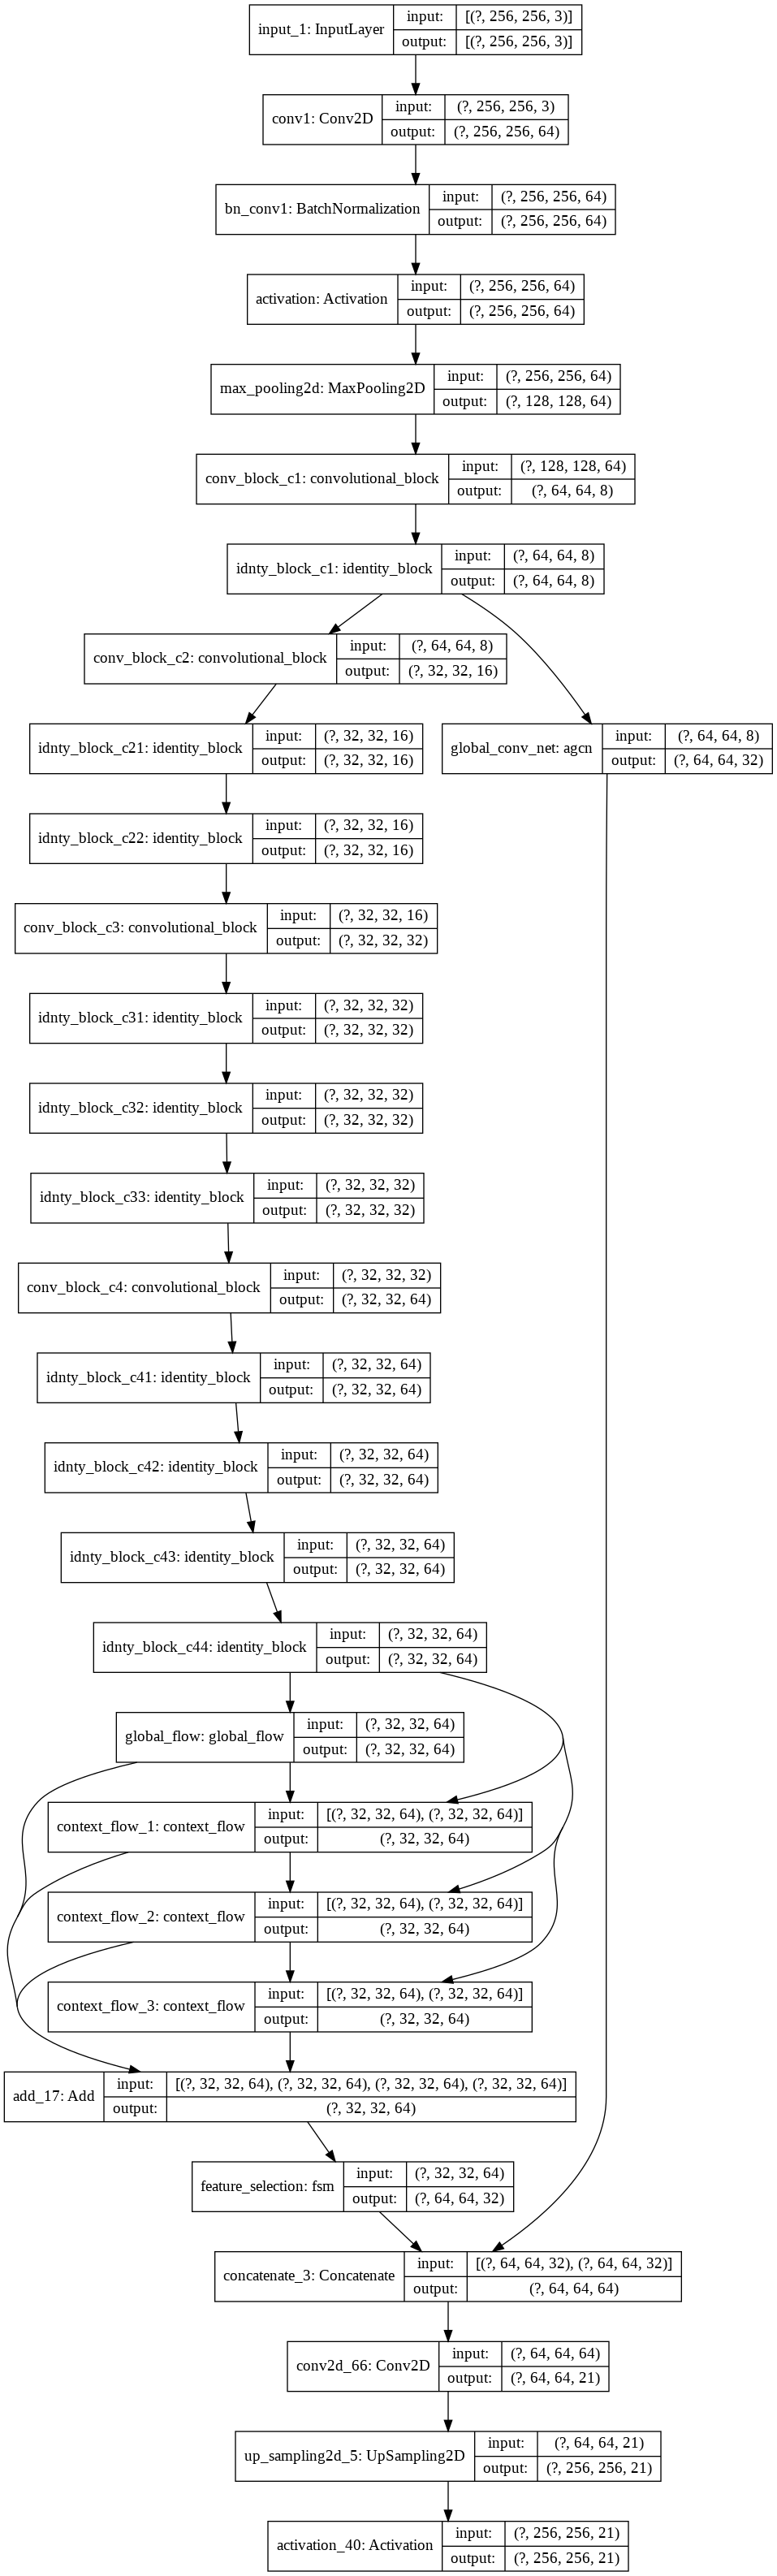

In [44]:
tf.keras.utils.plot_model(model2, to_file='CANET_model.png',
                          show_shapes=True, show_layer_names=True,
                          rankdir='TB')

In [45]:
# Creating train and validation dataset generators
BATCH_SIZE = 4
train_dataset = Dataset(root_dir, train['image'].values, train['mask'].values, classes=classes, augment=True)
val_dataset = Dataset(root_dir, validation['image'].values, validation['mask'].values, classes=classes, augment=False)
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = Dataloder(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
print(f"Train dataloader shape: {train_dataloader[0][0].shape}")
print(f"Validation dataloader shape: {val_dataloader[0][1].shape}")

Train dataloader shape: (4, 256, 256, 3)
Validation dataloader shape: (4, 256, 256, 21)


In [46]:
# Importing callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

# Importing segmentation models loss and metrcis
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [47]:
# Defining Callbacks
if "canet" not in os.listdir():
    os.mkdir("/content/canet")
    os.mkdir("/content/canet/saved_models")
    os.mkdir("/content/canet/logs")

save_path = "/content/canet/saved_models/epoch:{epoch:02d}_loss:{val_loss:.4f}.hdf5"
log_path = "/content/canet/logs"
saver = ModelCheckpoint(save_path, save_best_only=True, monitor='val_loss', mode='min')
stopper = EarlyStopping(monitor='val_iou_score', mode='max', patience=2)
reducer = ReduceLROnPlateau(monitor='val_iou_score', factor=0.5, min_lr=0.0000001, mode='max', patience=2)
tb = TensorBoard(log_path, histogram_freq=2)
callbacks = [tb]

In [48]:
#Importing loss and metric
import segmentation_models as sm
from segmentation_models.metrics import iou_score

optim = tf.keras.optimizers.Adam(0.000001)
focalloss = sm.losses.dice_loss
#metric = sm.metrics.IOUScore(threshold=0.5)
# Compiling the model
model2.compile(optim, focalloss, metrics=[iou_score])

In [49]:
# Training the model
canet_hist = model2.fit(train_dataloader, epochs=10, steps_per_epoch=len(train_dataloader),
                        validation_data=val_dataloader, validation_steps=len(val_dataloader),
                        callbacks = callbacks)

Epoch 1/10
901/901 [==============================] - 252s 280ms/step - loss: 0.9172 - iou_score: 0.0533 - val_loss: 0.9142 - val_iou_score: 0.0547
Epoch 2/10
901/901 [==============================] - 250s 277ms/step - loss: 0.8752 - iou_score: 0.1072 - val_loss: 0.8740 - val_iou_score: 0.1235
Epoch 3/10
901/901 [==============================] - 249s 276ms/step - loss: 0.8348 - iou_score: 0.1629 - val_loss: 0.8421 - val_iou_score: 0.1954
Epoch 4/10
901/901 [==============================] - 246s 273ms/step - loss: 0.8108 - iou_score: 0.2139 - val_loss: 0.8131 - val_iou_score: 0.3255
Epoch 5/10
901/901 [==============================] - 246s 274ms/step - loss: 0.7931 - iou_score: 0.2756 - val_loss: 0.7996 - val_iou_score: 0.4217
Epoch 6/10
901/901 [==============================] - 246s 273ms/step - loss: 0.7809 - iou_score: 0.3168 - val_loss: 0.7898 - val_iou_score: 0.4927
Epoch 7/10
901/901 [==============================] - 247s 274ms/step - loss: 0.7737 - iou_score: 0.3615 - val_l

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/canet/logs

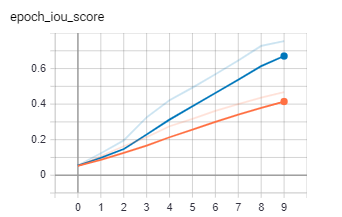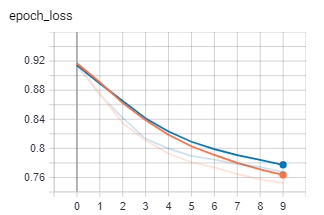

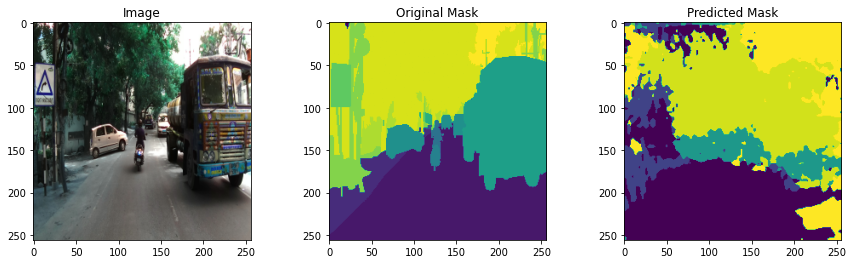

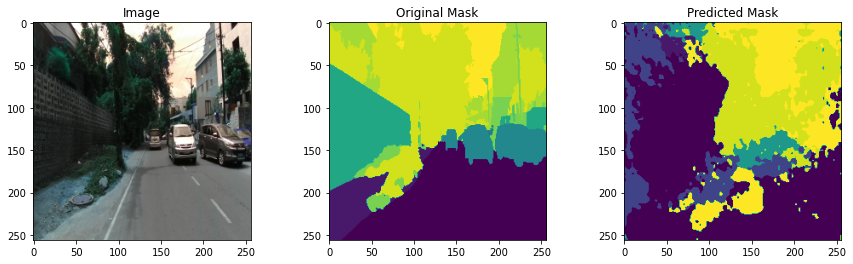

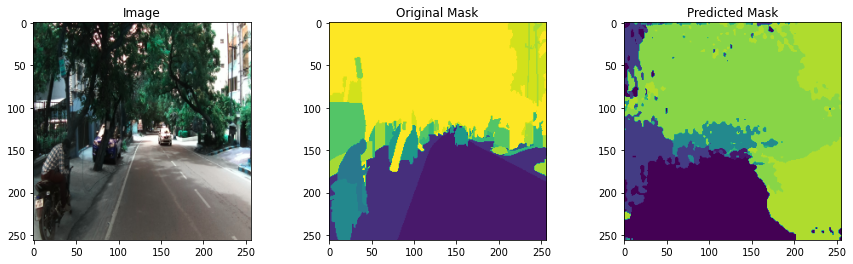

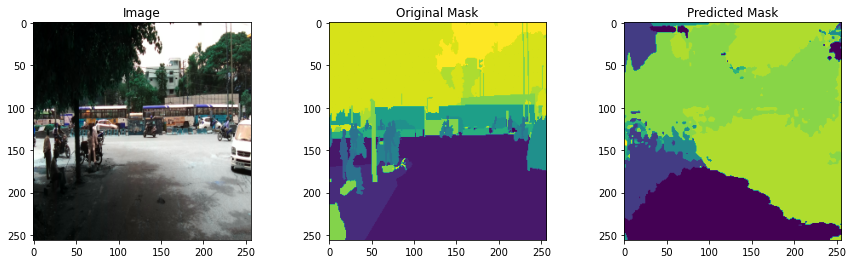

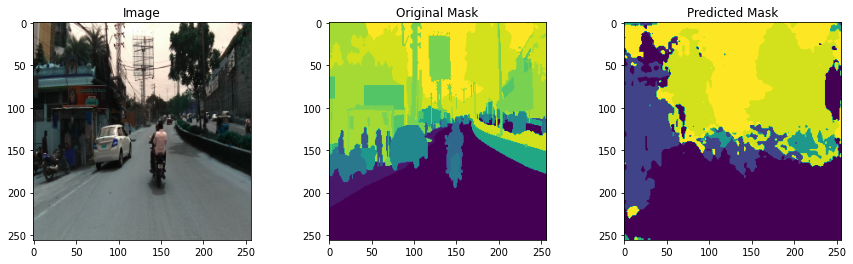

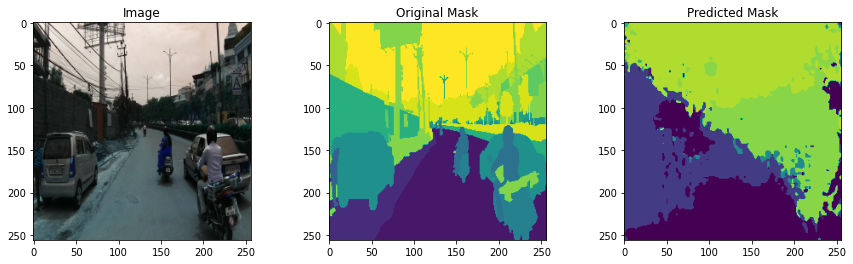

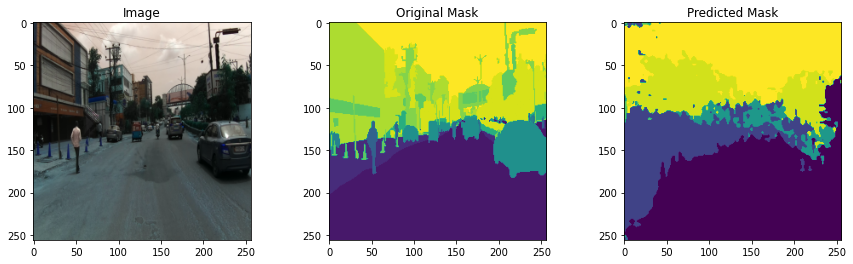

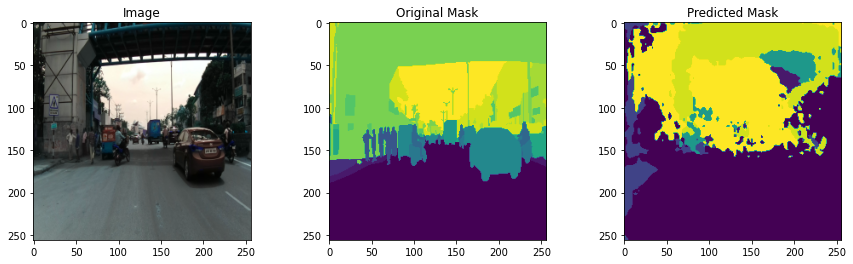

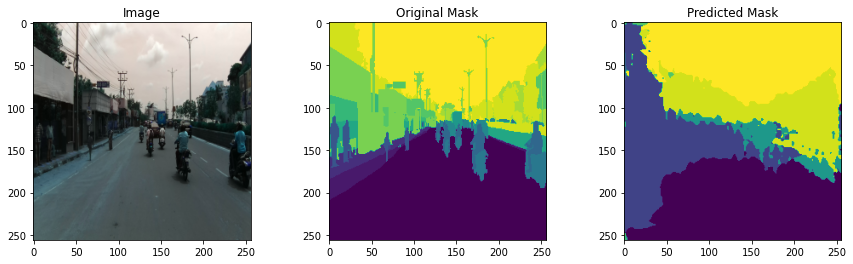

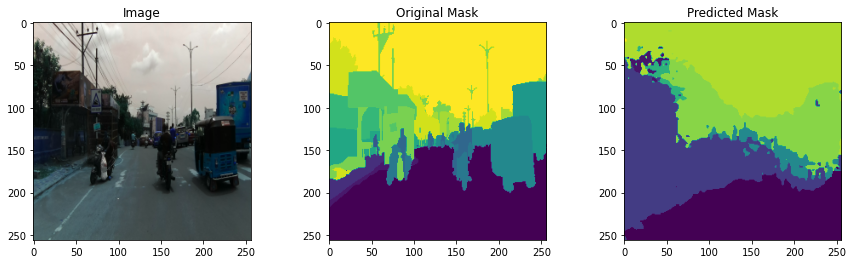

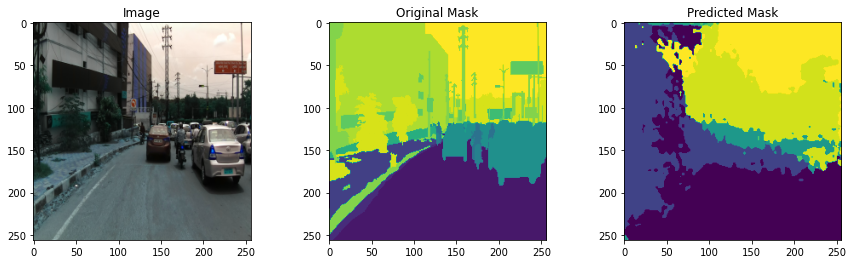

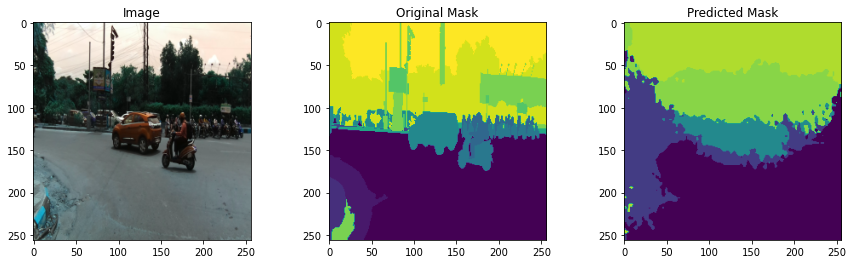

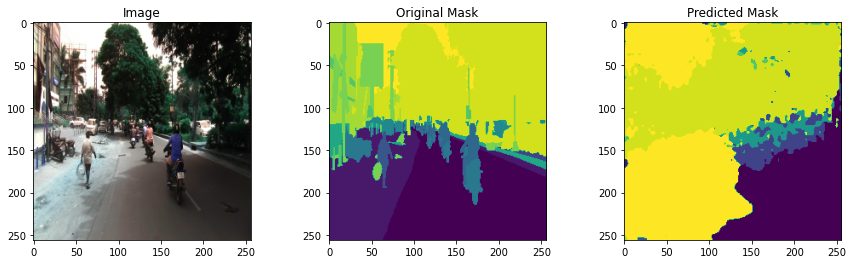

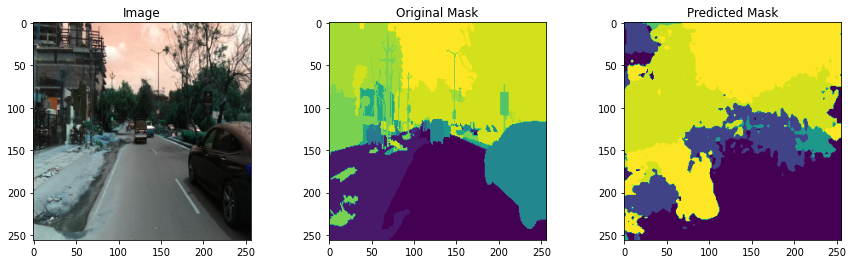

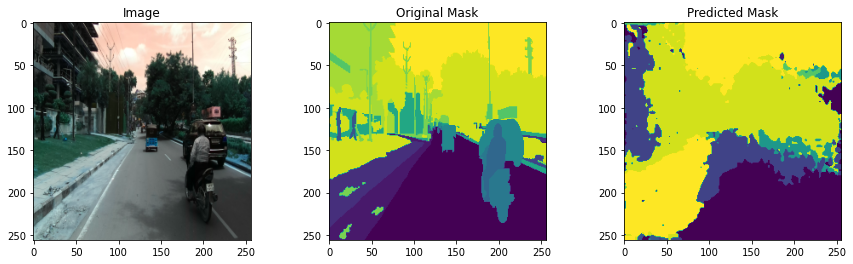

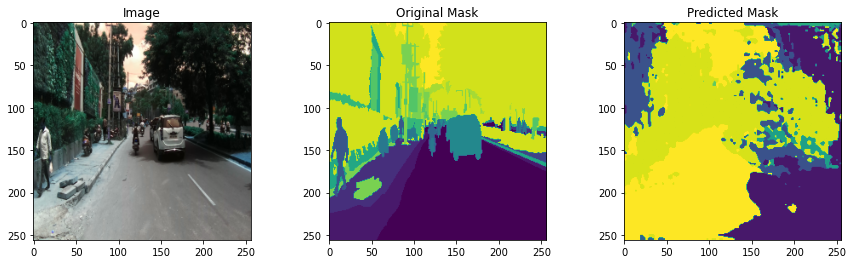

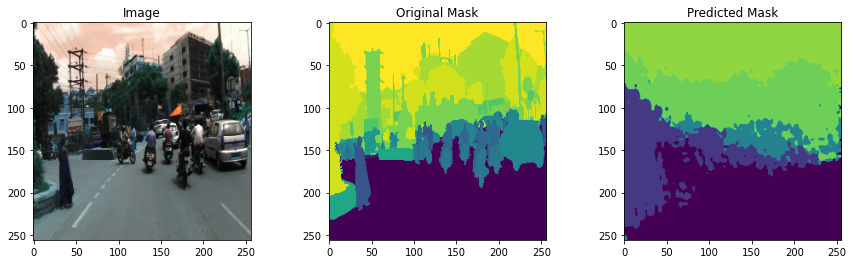

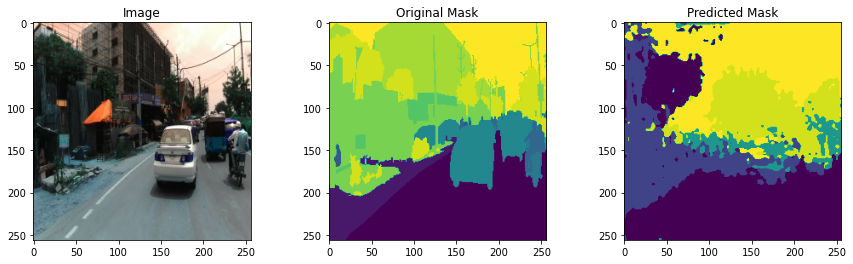

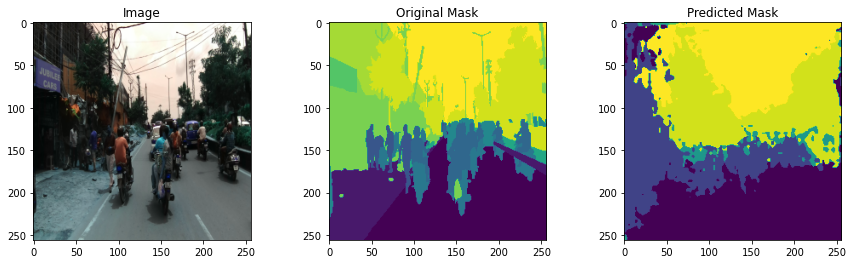

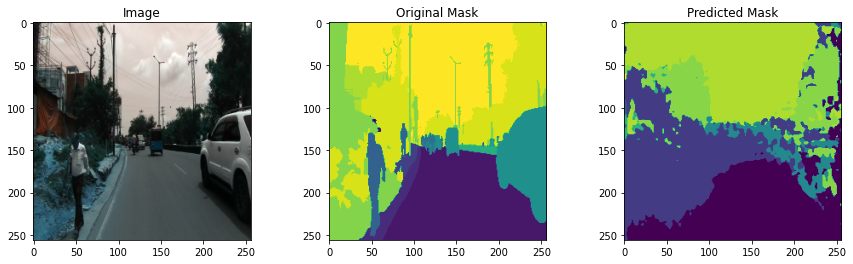

In [50]:
for i in range(20):    
    img = cv2.imread(validation['image'].values[i])
    img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)

    tar_mask = cv2.imread(validation['mask'].values[i], cv2.IMREAD_UNCHANGED)
    tar_mask = cv2.resize(tar_mask, (256, 256), interpolation = cv2.INTER_NEAREST)

    pred_mask = model2.predict(img[np.newaxis,:,:,:])
    pred_mask = tf.argmax(pred_mask, axis=-1)

    plt.figure(figsize=(15, 4))
    plt.subplot(131, title="Image")
    plt.imshow(img)
    plt.subplot(132, title="Original Mask")
    plt.imshow(tar_mask)
    plt.subplot(133, title="Predicted Mask")
    plt.imshow(pred_mask[0])

In [55]:
from prettytable import PrettyTable

print("Models Summary: ")
tab = PrettyTable(field_names = ["Model", "Train Loss", "Val Loss", "Train IOU", "Val IOU "])
tab.add_rows([["UNET", 0.5599, 0.5443, 0.8391, 0.7651],
              ["CANET", 0.7526, 0.7675, 0.4669, 0.7542]])
print(tab)

Models Summary: 
+-------+------------+----------+-----------+----------+
| Model | Train Loss | Val Loss | Train IOU | Val IOU  |
+-------+------------+----------+-----------+----------+
|  UNET |   0.5599   |  0.5443  |   0.8391  |  0.7651  |
| CANET |   0.7526   |  0.7675  |   0.4669  |  0.7542  |
+-------+------------+----------+-----------+----------+
